# Investigate Simard data and calculate covariance matrix and means for apparent Sersic parameters

In this notebook I will load the Sersic only paramters and use Seaborn to plot corner plots

In [18]:
from astropy.io import fits

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import numpy as np
import pandas as pd
from scipy import stats, integrate
import seaborn as sns
sns.set(color_codes=True)


In [19]:
datafile = '/Users/rs548/Documents/Science/PeteHurley/Simard/table3wheadings.dat'
data = pd.read_csv(datafile,sep='\s+')
columns = ['z','$n_b$','$R_{chl,g}$','$g_{g2d}$','$M_{r,g}$','$e$']
df2 = data[columns]
len0 = len(df2)
for column in columns:
    df2 = df2.drop(df2[df2[column] == -99.99].index)
print(str(len0 - len(df2)) + ' columns removed because of -99.99 values')



14237 columns removed because of -99.99 values


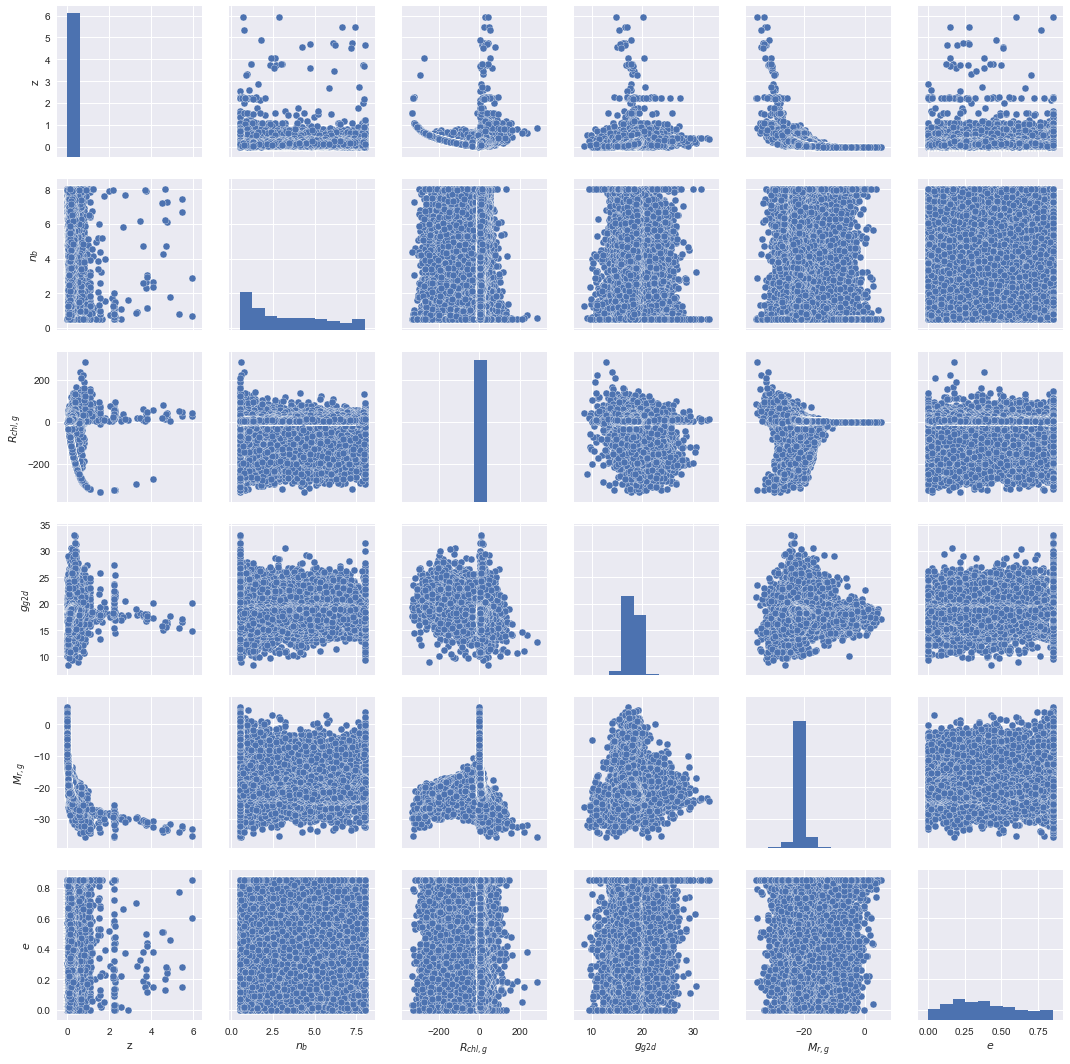

In [20]:
sns.pairplot( data=df2)



/Users/rs548/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


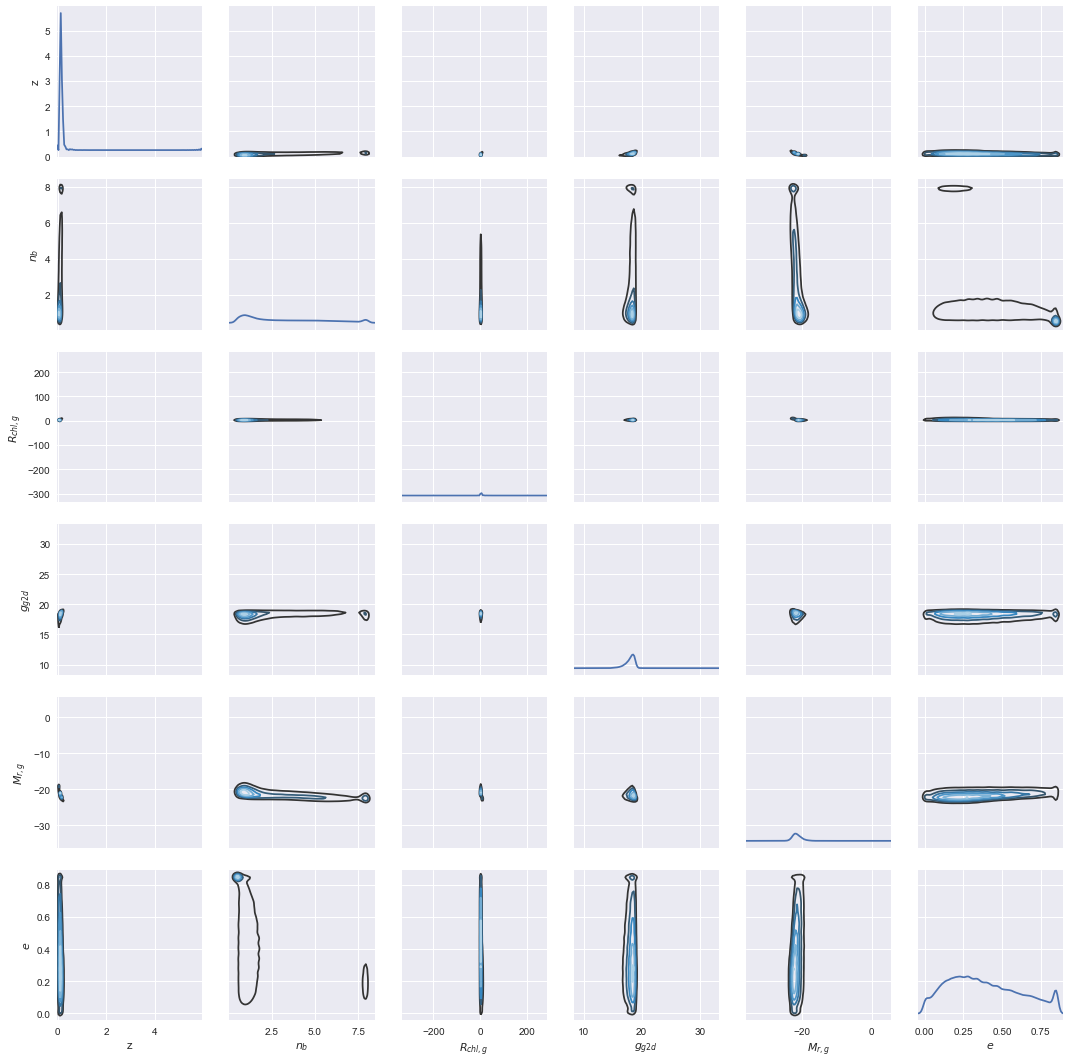

In [21]:
g = sns.PairGrid(data=df2)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6)

In [22]:
g.savefig('/Users/rs548/Documents/Science/PeteHurley/Simard/kdecorner.png')

In [23]:
df2

,z,$n_b$,"$R_{chl,g}$",$g_{g2d}$,"$M_{r,g}$",$e$
0,0.030284,1.83,1.18,18.19,-18.28,0.67
1,0.077923,0.57,3.61,18.02,-20.63,0.62
2,0.099295,0.94,3.48,18.80,-20.42,0.51
3,0.160228,1.28,12.14,17.89,-22.81,0.43
4,0.071558,1.29,3.89,17.60,-21.10,0.34
5,0.071975,1.02,4.73,17.38,-21.34,0.64
6,0.054841,1.09,4.75,16.05,-21.81,0.20
7,0.054572,0.57,2.71,17.82,-19.80,0.35
8,0.080338,0.84,5.28,18.22,-20.77,0.80
9,0.024743,0.50,0.26,18.22,-17.78,0.85


In [29]:
len(df2[df2['$R_{chl,g}$'] < 0])


14642

In [30]:
len(df2[df2['$R_{chl,g}$'] == 0])

3923

In [31]:
len(df2[df2['$R_{chl,g}$'] > 0])

1090916